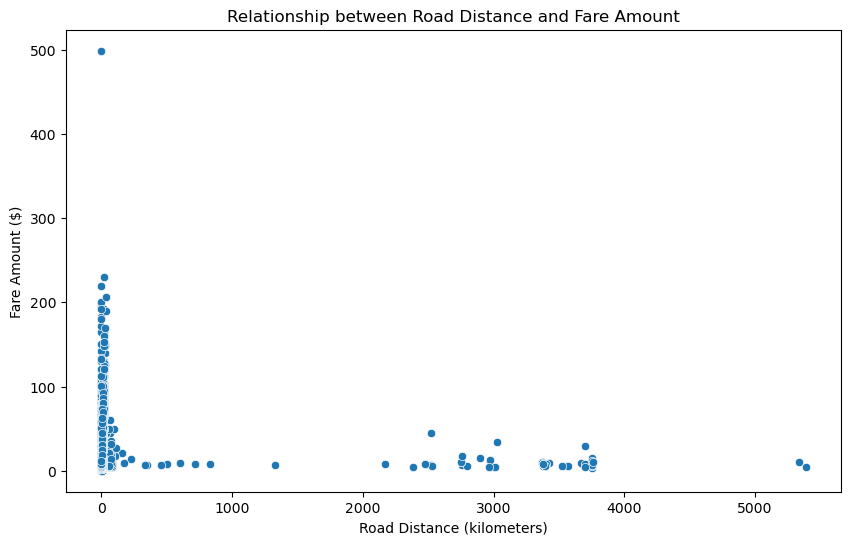

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load your processed Uber rides data into a DataFrame
df = pd.read_csv("Resources/uber_rides_processed.csv")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='road_distance', y='fare_amount', data=df)
plt.title('Relationship between Road Distance and Fare Amount')
plt.xlabel('Road Distance (kilometers)')
plt.ylabel('Fare Amount ($)')
plt.show()

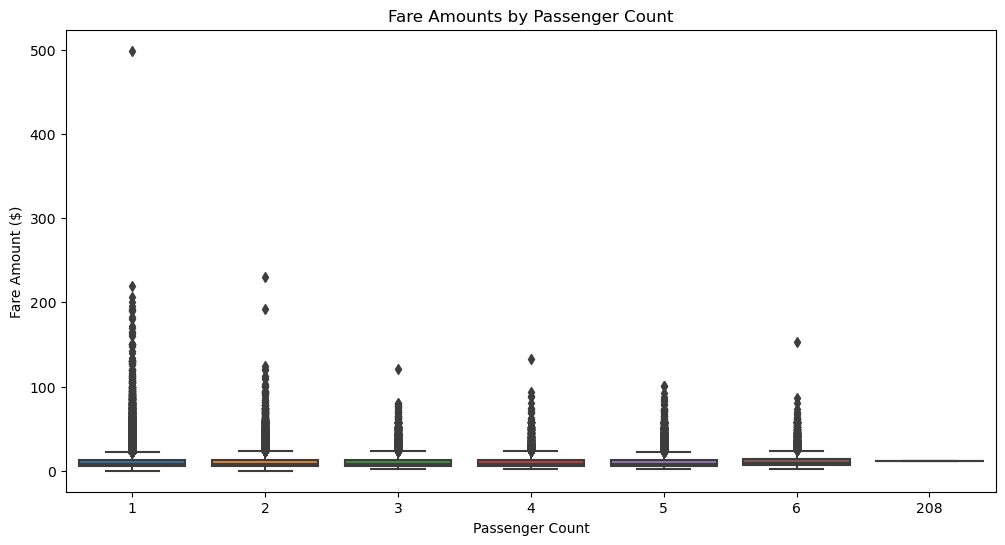

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amounts by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

C:\Users\adamf\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


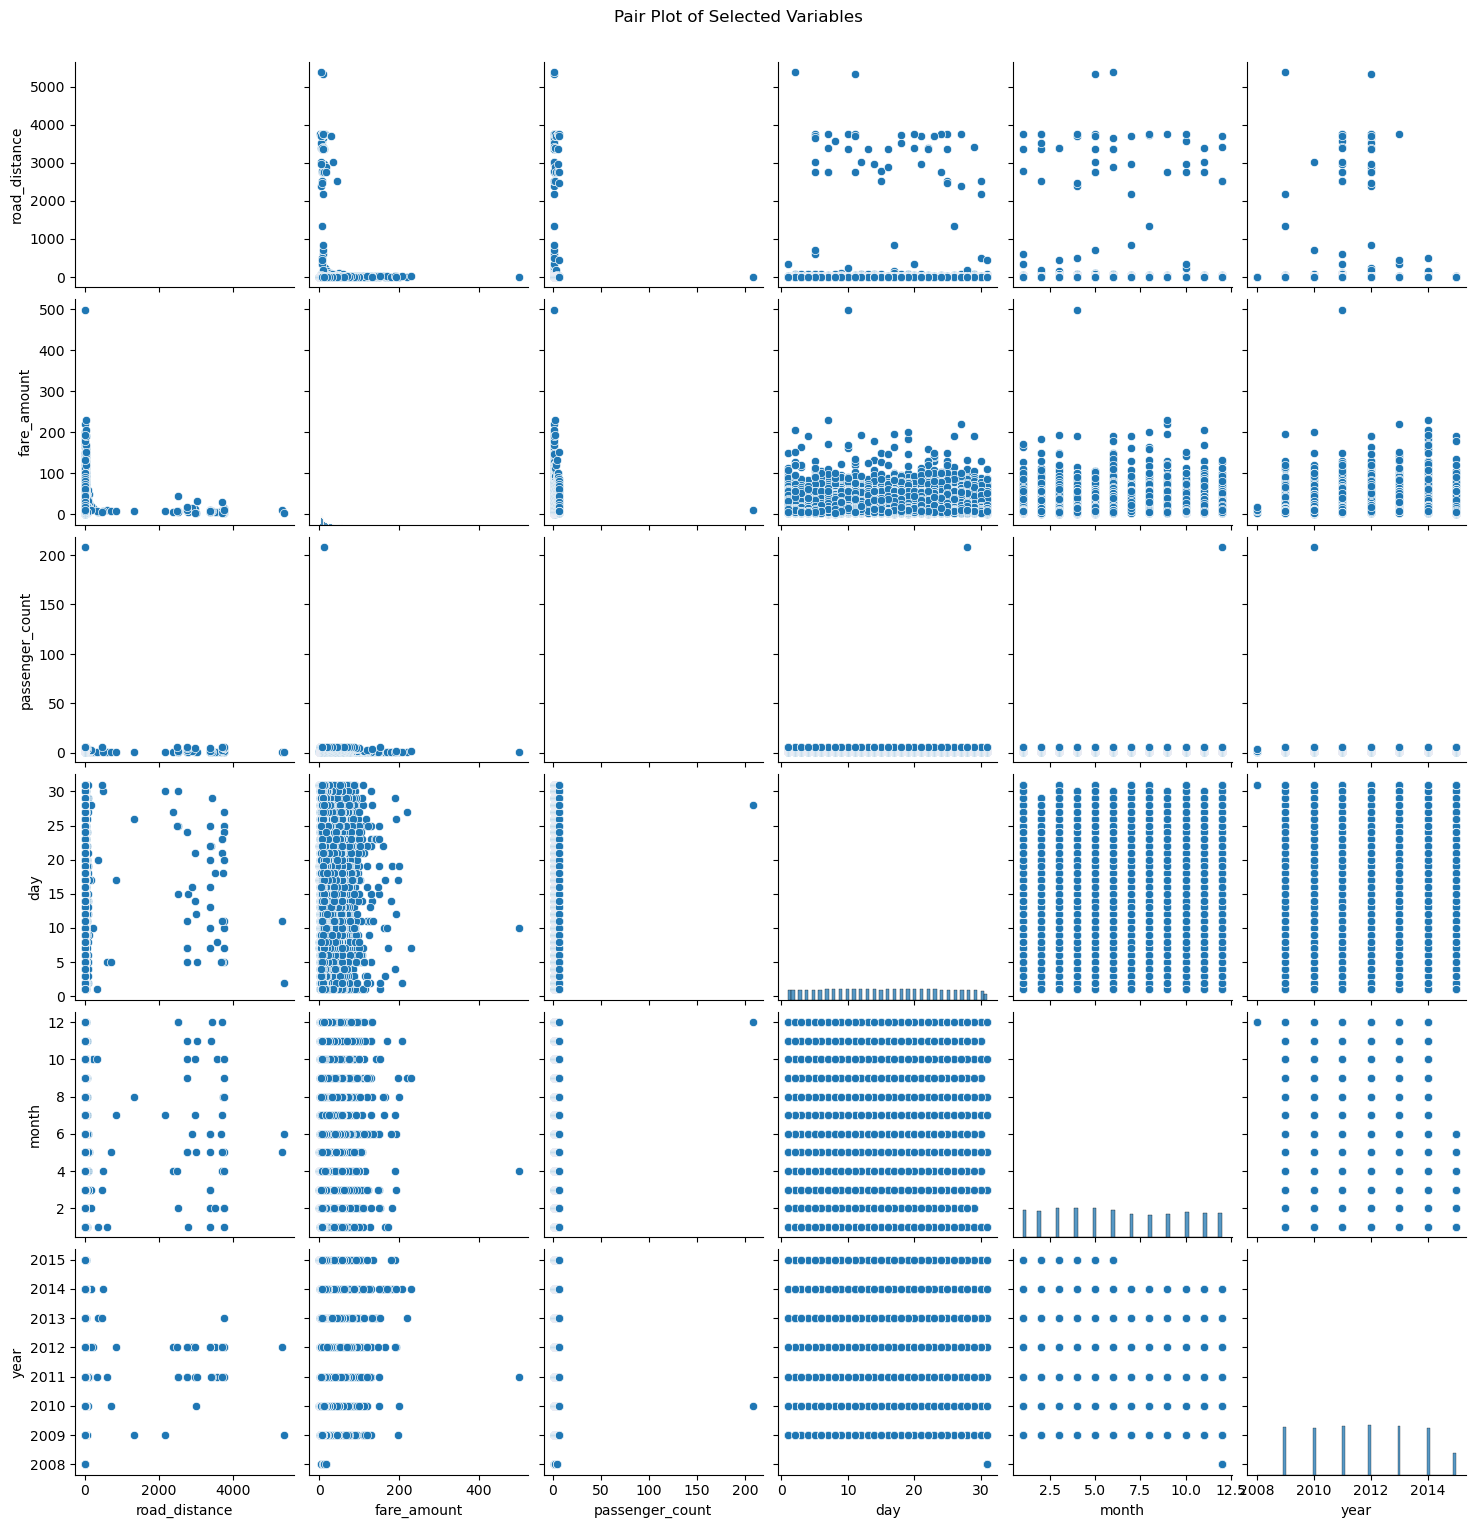

In [6]:
sns.pairplot(df[['road_distance', 'fare_amount', 'passenger_count', 'day', 'month', 'year']])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '2015-05-07'

<Figure size 1000x800 with 0 Axes>

In [9]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming df is your DataFrame with the necessary columns
# Create two groups based on road_distance (e.g., short-distance and long-distance)
threshold = 10  # Adjust the threshold based on your definition of short and long distance
short_distance = df[df['road_distance'] < threshold]
long_distance = df[df['road_distance'] >= threshold]

# Calculate summary statistics for fare_amount in each group
summary_stats = pd.DataFrame({
    'Short Distance': short_distance['fare_amount'].describe(),
    'Long Distance': long_distance['fare_amount'].describe()
})

# Add t-test results to the table
t_stat, p_value = ttest_ind(short_distance['fare_amount'], long_distance['fare_amount'])
summary_stats['T-Statistic'] = t_stat
summary_stats['P-Value'] = p_value

# Display the table
print(summary_stats)

       Short Distance  Long Distance  T-Statistic  P-Value
count   191033.000000    4291.000000  -332.825638      0.0
mean        10.468161      50.706297  -332.825638      0.0
std          7.574032      15.439068  -332.825638      0.0
min          0.000000       2.500000  -332.825638      0.0
25%          6.000000      45.000000  -332.825638      0.0
50%          8.500000      49.800000  -332.825638      0.0
75%         12.100000      57.330000  -332.825638      0.0
max        499.000000     230.000000  -332.825638      0.0


In [ ]:
print(summary_stats)

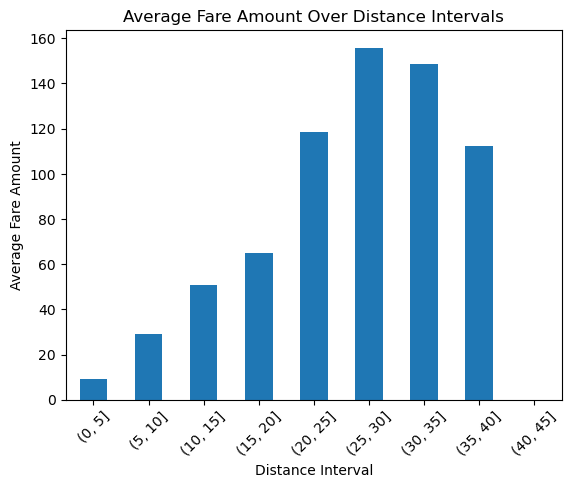

In [11]:
import numpy as np

# Create distance intervals
df['distance_interval'] = pd.cut(df['road_distance'], bins=np.arange(0, 50, 5))

# Bar plot of average fare_amount over distance intervals
df.groupby('distance_interval')['fare_amount'].mean().plot(kind='bar', rot=45)
plt.xlabel('Distance Interval')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount Over Distance Intervals')
plt.show()

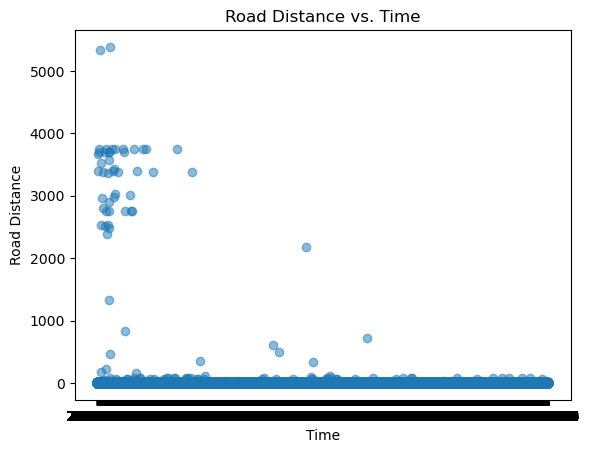

In [13]:
# Scatter plot of road_distance vs. time
plt.scatter(df['time'], df['road_distance'], alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Road Distance')
plt.title('Road Distance vs. Time')
plt.show()


In [ ]:
short_distances = df[df['distance_category'] == 'Short']['fare_amount']
long_distances = df[df['distance_category'] == 'Long']['fare_amount']

t_statistic, p_value = stats.ttest_ind(short_distances, long_distances, equal_var=False)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')